# 1D CNN Model 

In [551]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [556]:
features = pd.read_csv("F:/HAR/PAMAP2_Dataset/pamap_features.csv", index_col=0)

In [557]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,100.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,1
1,8.39,0,100.0,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,1
2,8.40,0,100.0,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,1
3,8.41,0,100.0,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,1
10,8.48,0,104.0,30.0000,2.29745,8.90450,3.46984,2.39736,8.94335,3.53551,...,0.002283,0.020352,-61.5302,-38.72400,-58.386000,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872489,99.80,0,161.0,25.1875,-2.36226,10.75660,7.05010,-2.42638,11.11050,6.67665,...,-0.181098,-0.261212,-45.9456,6.51345,-0.604719,0.607841,0.038281,0.790831,-0.060412,9
2872500,99.91,0,161.0,25.1875,-5.04845,11.03180,5.77734,-4.97782,11.36990,5.89345,...,-0.090799,-0.268806,-45.5317,5.33578,-0.034568,0.602243,0.028750,0.796044,-0.052829,9
2872511,100.02,0,161.0,25.1875,-6.37083,11.64810,5.63999,-6.56804,12.48360,5.65103,...,-0.039849,-0.012008,-46.5426,4.87121,-0.037586,0.601586,0.030352,0.797070,-0.043034,9
2872522,100.13,0,161.0,25.1875,-4.98611,8.70795,4.78544,-5.18338,9.13554,5.18882,...,-0.099871,-0.122716,-45.6598,5.21258,-0.318540,0.599363,0.036095,0.798798,-0.037196,9


In [558]:
label = LabelEncoder()
features['activityID'] = label.fit_transform(features['activityID'])
features.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,100.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,100.0,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,100.0,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,100.0,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
10,8.48,0,104.0,30.0,2.29745,8.90450,3.46984,2.39736,8.94335,3.53551,...,0.002283,0.020352,-61.5302,-38.7240,-58.3860,1.0,0.0,0.0,0.0,1


In [559]:
features['activityID'].value_counts()

0     84308
11    21696
4     20998
1     17575
3     17256
2     16881
7     16857
10    15997
6     14933
8     10699
9      9585
5      8665
12     4356
Name: activityID, dtype: int64

<AxesSubplot:xlabel='activityID', ylabel='count'>

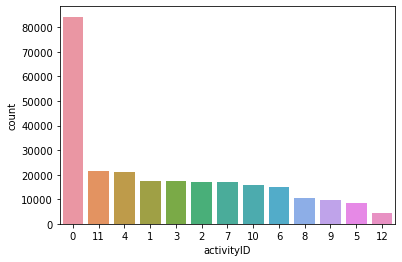

In [560]:
sns.countplot(x = "activityID", data = features, order = features.activityID.value_counts().index)

In [561]:
indexes = features[features['activityID'] == 0].index
features.drop(indexes , inplace=True)

In [562]:
features['activityID'].value_counts()

11    21696
4     20998
1     17575
3     17256
2     16881
7     16857
10    15997
6     14933
8     10699
9      9585
5      8665
12     4356
Name: activityID, dtype: int64

In [563]:

from sklearn.preprocessing import StandardScaler

X = features[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']]
y= features['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3'])
scaled_X['label'] = y.values

In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

# Hyperparameter Tunning

In [565]:
#TIME_STEPS : The length of the time segment.
#STEP : Determines the amount of overlap between two consecutive time segments.
    
    
TIME_STEPS = 64
STEP = 64


In [566]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train, y_train = create_dataset(X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

<ipython-input-566-9c6ad9659314>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(137, 64, 36) (137, 1)


In [567]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [568]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (137, 64, 36)
X_test.shape  (2605, 64, 36)
y_train.shape  (137, 9)
y_test.shape  (2605, 9)


In [569]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [570]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [571]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [572]:
n_timesteps, n_features, n_outputs

(64, 36, 9)

In [573]:
#CNN MODEL

inputs=keras.Input(shape=(n_timesteps,n_features))

conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)
maxpool_1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(conv_1)

conv_2=tf.keras.layers.Conv1D(filters=96,kernel_size=3,strides=1,activation='relu')(maxpool_1)
avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_2)
batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

output=tf.keras.layers.Dense(n_outputs,activation='softmax')(batch_norm)
model=tf.keras.Model(inputs=inputs,outputs=output)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 64, 36)]          0         
                                                                 
 conv1d_36 (Conv1D)          (None, 30, 64)            11584     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 15, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_37 (Conv1D)          (None, 13, 96)            18528     
                                                                 
 global_average_pooling1d_3   (None, 96)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 batch_normalization_3 (Batc  (None, 96)               384 

In [574]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

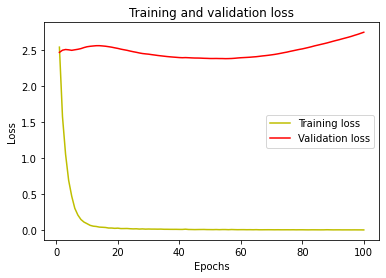

In [576]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

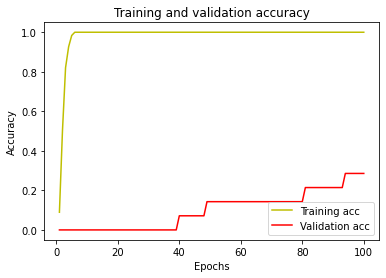

In [577]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [578]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [579]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

82/82 [==============================] - 0s 2ms/step - loss: 2.3509 - accuracy: 0.2499
Accuracy >24.990404
Base Loss >2.35
